<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('real_estate_data.csv')
df.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


In [3]:
# данные в таблице выше разделены табуляцией (т.е. \t).
# для правильного отображения табличных данных, укажем соответствующий разделитель столбцов в методе считывания.

df = pd.read_csv('real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', 22) # отображаются все столбцы
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
# вывод произвольных 5 строк, которые будут одинаковы для всех попыток вызова этого метода с параметром random_state
df.sample(n=5, random_state=10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22564,6,4100000.0,55.0,2016-03-15T00:00:00,2,NaN,12.0,32.0,1,NaN,False,False,NaN,0.0,Санкт-Петербург,15760.0,15976.0,1.0,719.0,0.0,NaN,183.0
16617,12,6800000.0,69.0,2018-11-08T00:00:00,2,2.9,5.0,42.0,2,NaN,False,False,13.0,NaN,Санкт-Петербург,31276.0,5131.0,2.0,172.0,2.0,482.0,107.0
11628,0,6400000.0,60.4,2016-02-19T00:00:00,2,NaN,5.0,38.6,5,NaN,False,False,8.0,0.0,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,188.0
1984,1,6250000.0,61.0,2016-06-17T00:00:00,3,NaN,9.0,44.0,5,NaN,False,False,6.3,0.0,Санкт-Петербург,48175.0,16156.0,0.0,NaN,0.0,NaN,60.0
18017,0,1700000.0,43.7,2017-09-04T00:00:00,2,2.6,5.0,31.1,1,NaN,False,False,5.3,0.0,поселок Мичуринское,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Расшифровка наименований столбцов:

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
- `balcony` — число балконов  
- `ceiling_height` — высота потолков (м)  
- `cityCenters_nearest` — расстояние до центра города (м)  
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
- `first_day_exposition` — дата публикации  
- `floor` — этаж  
- `floors_total` — всего этажей в доме  
- `is_apartment` — апартаменты (булев тип)  
- `kitchen_area` — площадь кухни в квадратных метрах (м²)  
- `last_price` — цена на момент снятия с публикации  
- `living_area` — жилая площадь в квадратных метрах (м²)  
- `locality_name` — название населённого пункта  
- `open_plan` — свободная планировка (булев тип)  
- `parks_around3000` — число парков в радиусе 3 км  
- `parks_nearest` — расстояние до ближайшего парка (м)  
- `ponds_around3000` — число водоёмов в радиусе 3 км  
- `ponds_nearest` — расстояние до ближайшего водоёма (м)  
- `rooms` — число комнат  
- `studio` — квартира-студия (булев тип)  
- `total_area` — площадь квартиры в квадратных метрах (м²)  
- `total_images` — число фотографий квартиры в объявлении  

In [5]:
# общая информация об изучаемой таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
# информация по числовым столбцам
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [7]:
df.describe().T # более компактный вид, при большом количестве столбцов

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [8]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод

Для анализа представлен широкий набор данных. Приблизительно в половине столбцов выявлены пропуски (или отсутствующие значения), которые нужно будет обрабатывать. Тип данных в столбце `first_day_exposition` не соответствует дате. В некоторых столбцах тип данных можно поменять с вещественного на целочисленный (например, столбец `floors_total`).

## Предобработка данных

**Приведение данных к корректному типу**

In [9]:
# проверим названия столбцов на соответствие принятым правилам (латиница, строчные буквы, между словами нижнее подчеркивание)
df.columns
# проверка пройдена

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Предварительная обработка данных по столбцам**

In [10]:
# приведем тип данных в столбце `first_day_exposition` к типу `datetime`
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # время отбрасываем ввиду малой информативности

Приведения к типам данных других столбцов будет выполнено после предварительной обработки (наличие `NaN` не позволяет корректно выполнить операцию на данном этапе). См. конец этого радела.

**Работ с пропусками и аномальными данными**

**Столбец `rooms`**

In [11]:
# в столбце 'rooms' обнаружены нулевые значения.
# определяем количество таких строк
df.query('rooms==0').shape[0]

197

In [12]:
# проводим анализ этих отфильтрованных строк с привязкой к столбцам 'studio', 'open_plan'
df.query('rooms==0').groupby(['studio', 'open_plan'])['studio', 'open_plan'].count()

,,studio,open_plan
studio,open_plan,,
False,True,59,59
True,False,138,138


Обработка данных в столбце `rooms` для нулевых значений выявила закономерность – количество меток `False` в столбце `studio` соответствует количеству меток `True` в столбце `open_plan`. Также справедливо обратное.  
Таким образом на данном этапе можно выделить две отдельные категории – квартиры-студии в количестве 138, а также квартиры со свободной планировкой в количестве 59.

In [13]:
# общая характеристика квартиры студии по метражу помещения
df.query('rooms==0 and studio==True and open_plan==False')['total_area'].describe()

count    138.000000
mean      27.814348
std        9.611879
min       15.500000
25%       24.000000
50%       26.000000
75%       28.775000
max       98.400000
Name: total_area, dtype: float64

In [14]:
# общая характеристика квартиры со свободной планировкой по метражу помещения
df.query('rooms==0 and ~studio==True and ~open_plan==False')['total_area'].describe()

count     59.000000
mean      32.707288
std       44.986261
min       16.000000
25%       25.000000
50%       26.100000
75%       28.250000
max      371.000000
Name: total_area, dtype: float64

Медианные значения для площади квартиры в этих двух категориях практически совпадают. При этом 75% (3-й квартиль) таких кваритр имеют площадь менее 29 кв.м. (значение округлено до ближайшего большего целого, т.е. приблизительно квантиль q=0.8).  
Можно предположить, что для этой доли квартир (80%) равноценным будет присвоение количества комнат равное 1.  
Для квартир с большей площадью (более 29 кв.м.) применим следующий алгоритм корректировки нулевых значений в ячейке `rooms`:
- выбираем из всей таблицы строки, в которых количество комнат 0 и площадь квартиры превышает 29 кв.м. 
- отбираем значения площади таких квартир  
- итерируемся по отобранным значениям  
- из оставшихся квартир (известно количество комнат) выбираем квартиры с аналогичной площадью +/-15%
- считаем медиану по количеству комнат
- присваиваем ячейке с нулевым значением эту медиану

In [15]:
# для столбца 'rooms' применим следующий подход по корректировке нулевых значений

# значение в ячейке столбца 'rooms', которое подлежит корректировке
rooms_zero = 0

# пороговое значение по максимальной площади (приблизительно 29 кв.м.)
# при меньшем или равном значении, будет присваиваться количество комнат равное 1, при большем – см. описание функции ниже.
area_threshold = df.query('rooms==@rooms_zero')['total_area'].quantile(q=0.8)

# в цикле проходим по всем ячейкам, в которых количество комнат 0 и общая площадь превышает пороговое значение 'area_threshold'
# для каждого полученного значения общей площади берём диапазон +/-15%
# в пределах этого диапазона смотрим все квартиры, для которых корректно указано количество комнат
# из этого перечня комнат берем медианное значение
# словарь формируем по следующему принципу:
#     ключ – это площадь квартиры, где количество комнат указано как 0
#     значение – медиана по количеству комнат у квартир с такой же площадью +/-15% и известным значением количества комнат
lage_area_apartment = {}
for item in df.query('rooms==@rooms_zero and total_area > @area_threshold')['total_area'].to_list():
    lage_area_apartment[item] = df.query('rooms != @rooms_zero and total_area > @item*0.85 and total_area < @item*1.15')['rooms'].median()


def room_number_correction(row):
    """
    Функция заменяет нулевые значения в столбце 'rooms', используя правила:
    - если общая площадь квартиры 'total_area' меньше 0.8 квантиля, возвращается количество комнат равное 1
    - иначе для каждой квартиры с большей площадью создаётся диапазон 'total_area' +/- 10%,
    в этот диапазон отбираются все удовлетворяющие условию квартиры с известным количеством комнат
    (т.е. их значения в ячейке 'total_area' попадают в созданный выше диапазон 'total_area' +/- 10%),
    далее выбирается медианное значение по количеству комнат
    """
    
    total_area = row['total_area']
    rooms = row['rooms']
    
    if rooms == rooms_zero and total_area <= area_threshold:
        return 1
    elif rooms == rooms_zero and total_area > area_threshold:
        return lage_area_apartment[total_area]
    else:
        return rooms

    
df['rooms'] = df.apply(room_number_correction, axis=1)

In [16]:
# нулевые значения отсутствуют
df['rooms'].describe()

count    23699.000000
mean         2.079539
std          1.066588
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

**Столбец `ceiling_height`**

In [17]:
# отсутствующие значения заменяем медианой
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [18]:
# значения менее 2,5 м или более 4,5 м также заменяем медианой
df['ceiling_height'] = df['ceiling_height'].apply(lambda x: df['ceiling_height'].median() if x < 2.5 or x > 4.5 else x)
df['ceiling_height'].describe()

count    23699.000000
mean         2.696385
std          0.211915
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.500000
Name: ceiling_height, dtype: float64

**Столбец `floors_total`**

In [19]:
# наибольшая доля пропущенных данных в столбце позволяет их удалить
df['floors_total'].isnull().mean()

0.0036288450989493226

In [20]:
# этажность восстановить по представленным данным нельзя, удаляем строки с отсутствующими значениями
df.dropna(subset = ['floors_total'], inplace=True)

**Столбец `living_area`**

In [21]:
# размер жилой площади 'living_area' зависит от количества жилых комнат
# вычислим медианное значение жилой площади с привязкой к количеству комнат
# сформируем словарь:
#     ключ – количество комнат
#     значение – медиана жилой площади 'living_area' для помещения с таким количеством комнат
dict_living_area_correction = pd.pivot_table(df, index='rooms', values='living_area', aggfunc='median').to_dict()
dict_living_area_correction

{'living_area': {1.0: 17.6,
  2.0: 30.5,
  3.0: 45.0,
  4.0: 63.5,
  5.0: 91.785,
  6.0: 124.4,
  7.0: 145.0,
  8.0: 161.0,
  9.0: 179.2,
  10.0: 161.4,
  11.0: 133.9,
  12.0: 409.7,
  14.0: 195.15,
  15.0: 409.0,
  16.0: 180.0,
  19.0: 264.5}}

In [22]:
# отсутствующие значения заменим медианой из словаря выше 'dict_living_area_correction' с привязкой к количеству комнат
df['living_area'] = df['living_area'].fillna(df['rooms'].map(dict_living_area_correction['living_area']))

In [23]:
# пропуски заполнены
df['living_area'].isnull().sum()

0

In [24]:
# аномально маленькие значения жилой площади 'living_area' (менее 8 кв.м.)
# также заполним медианой из словаря с привязкой к количеству комнат

def small_living_area_correction(row):
    """
    Функция заменяет нулевые значения в столбце 'rooms', используя правила:
    - если жилая площадь квартиры менее 8 кв.м., происходит корректировка в соответствии со словарем 'dict_living_area_correction'
    - иначе жилая площадь 'living_area' не изменяется
    """
    
    living_area = row['living_area']
    rooms = row['rooms']
    
    if living_area < 8:
        return dict_living_area_correction['living_area'][rooms]
    else:
        return living_area
    

df['living_area'] = df.apply(small_living_area_correction, axis=1)

In [25]:
# проверяем минимальное значение жилой площади 'living_area'
df['living_area'].describe()

count    23613.000000
mean        34.345194
std         21.719671
min          8.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

**Столбец `is_apartment`**

In [26]:
# значения должны иметь тип 'bool', т.к. возможны только два варианта 'False' или 'True'
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [27]:
# поскольку апартаменты пока еще не так сильно распространены,
# скорее всего большое число пропусков говорит о том, что этот тип недвижимости к ним не относится, т.е.
# пропуски нужно заполнять значением False
df['is_apartment'].isnull().sum()

20838

In [28]:
# заменяем пропуски значением False
df['is_apartment'] = df['is_apartment'].fillna(False)

In [29]:
# проверяем результат замены
df['is_apartment'].unique()

array([False,  True])

**Столбец `kitchen_area`**

In [30]:
# обработку пропуском производим по аналогии с подходом для столбца 'living_area'

# вычислим медианное значение площади кухни с привязкой к количеству комнат
# сформируем словарь:
#     ключ – количество комнат
#     значение – медиана площади кухни 'kitchen_area' для помещения с таким количеством комнат
dict_kitchen_area_correction = pd.pivot_table(df, index='rooms', values='kitchen_area', aggfunc='median').to_dict()
dict_kitchen_area_correction

{'kitchen_area': {1.0: 9.0,
  2.0: 8.7,
  3.0: 9.5,
  4.0: 11.05,
  5.0: 15.1,
  6.0: 19.75,
  7.0: 20.0,
  8.0: 25.0,
  9.0: 14.3,
  10.0: 19.8,
  11.0: 12.600000000000001,
  12.0: 112.0,
  14.0: 21.25,
  15.0: 100.0,
  16.0: 13.0,
  19.0: 27.6}}

In [31]:
# отсутствующие значения заменим медианой из словаря выше 'dict_kitchen_area_correction' с привязкой к количеству комнат
df['kitchen_area'] = df['kitchen_area'].fillna(df['rooms'].map(dict_kitchen_area_correction['kitchen_area']))

In [32]:
# пропуски заполнены
df['kitchen_area'].isnull().sum()

0

**Столбец `balcony`**

In [33]:
# проверяем количество пропусков
df['balcony'].isnull().sum()

11480

In [34]:
# предположим, что пропуски означают отсутствие балкона, т.е.
# меняем их на значение 0
df['balcony'] = df['balcony'].fillna(0)

In [35]:
# пропуски заполнены
df['balcony'].isnull().sum()

0

**Столбец `locality_name`**

In [36]:
# пропуски составляют незначительную часть,
# помимо этого нет привязки к географическим координатам или компасному направлению до центра
df['locality_name'].isnull().mean()

0.002032778554186253

In [37]:
# удаляем пропуски
df.dropna(subset = ['locality_name'], inplace=True)

In [38]:
# пропуски удалены
df['locality_name'].isnull().sum()

0

In [39]:
# поскольку в названиях населенных пунктов встречается буква «ё», ее лучше заменить на «е»
df['locality_name'].unique()[:5]

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино'], dtype=object)

In [40]:
df['locality_name'] = df['locality_name'].str.replace('ё','е')

In [41]:
# буква «ё» заменена
df['locality_name'].unique()[:5]

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино'], dtype=object)

**Столбец `airports_nearest`**

In [42]:
# пропуски присутствует почти в 1/4 записей
# удаление приведёт к потере значимого объема информации по всей таблице
# если в дальнейших расчетах информация из этого столбца использоваться не будет, пропуски можно не корректировать
# в ином случае, подход может быть следующим:
#     установить адрес
#     определить расстояние по карте до аэропорта с привязкой к дорожной сети

df['airports_nearest'].isnull().mean()

0.2344154466369616

**Столбец `cityCenters_nearest`**

In [43]:
# пропуски присутствует почти в 1/4 записей
# удаление приведёт к потере значимого объема информации по всей таблице
# если в дальнейших расчетах информация из этого столбца использоваться не будет, пропуски можно не корректировать
# в ином случае, подход может быть следующим:
#     установить адрес
#     определить расстояние по карте до центра с привязкой к дорожной сети

df['cityCenters_nearest'].isnull().mean()

0.23343942287290473

**Столбец `parks_around3000`**

In [44]:
# количество записей с пропусками
df.loc[df['parks_around3000'].isnull()].shape[0]

5500

In [45]:
# количество записей с пропусками
# для всех пропусков по количеству парков также не приводится информация по расстоянию до ближайшего из них
df.loc[(df['parks_around3000'].isnull()) & (df['parks_nearest'].isnull())].shape[0]

5500

In [46]:
# пропуски присутствует почти в 1/4 записей
# удаление приведёт к потере значимого объема информации по всей таблице
# если в дальнейших расчетах информация из этого столбца использоваться не будет, пропуски можно не корректировать
# в ином случае, подход может быть следующим:
#     установить адрес
#     определить по карте наличие парков на расстоянии 3 км

df['parks_around3000'].isnull().mean()

0.23339698705707618

In [47]:
# выявлены записи, в которых при нулевом количестве парков 'parks_around3000' известно расстояние до ближайшего из них 'parks_nearest'
# это всего несколько записей
df.query('parks_around3000 == 0 and parks_nearest > 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1590,3,7500000.0,70.0,2017-07-11,2.0,2.65,18.0,37.0,13,False,False,False,10.0,0.0,Санкт-Петербург,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0
10959,9,3000000.0,31.1,2017-03-21,1.0,2.65,5.0,17.7,2,False,False,False,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0
19208,17,14950000.0,187.0,2017-10-12,5.0,3.00,2.0,80.0,2,False,False,False,17.0,1.0,Санкт-Петербург,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0
19430,9,3900000.0,30.5,2018-02-22,1.0,2.60,5.0,16.5,1,False,False,False,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0


In [48]:
# для таких строк заменим нулевое значение в столбце 'parks_around3000' на значение равное 1

def parks_around3000_zero_correction(row):
    """
    Функция заменяет нулевые значения в столбце 'parks_around3000', используя правила:
    - если значение в столбце 'parks_around3000' нулевое, но расстояние до парка известно, возвращается 1
    - иначе значение в столбце 'parks_around3000' не изменяется
    """
    
    parks_around3000 = row['parks_around3000']
    parks_nearest = row['parks_nearest']
    
    if parks_around3000 == 0 and parks_nearest > 3000:
        return 1
    else:
        return parks_around3000
    

df['parks_around3000'] = df.apply(parks_around3000_zero_correction, axis=1)

**Столбец `parks_nearest`**

In [49]:
# пропуски присутствует почти в большей половине записей
# удаление приведёт к потере значимого объема информации по всей таблице
# если в дальнейших расчетах информация из этого столбца использоваться не будет, пропуски можно не корректировать
# в ином случае, подход может быть следующим:
#     установить адрес
#     определить расстояние по карте до парка
df['parks_nearest'].isnull().mean()

0.6592403988966687

In [50]:
# выявлены записи, в которых при нулевом количестве парков 'parks_around3000'
# отсутствует информация о расстоянии до этих парков 'parks_nearest'
df.query('parks_around3000 == 0 and parks_nearest != parks_nearest').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04,1.0,2.65,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
6,6,3700000.0,37.3,2017-11-02,1.0,2.65,26.0,10.6,6,False,False,False,14.4,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18,2.0,2.65,24.0,30.5,22,False,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
9,18,5400000.0,61.0,2017-02-26,3.0,2.50,9.0,43.6,7,False,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
11,9,3300000.0,44.0,2018-08-27,2.0,2.65,5.0,31.0,4,False,False,False,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0


In [51]:
# для данных случаев заполним пропуски в столбце 'parks_nearest' нулевым значением, т.к. парк отсутствует

def parks_nearest_correction(row):
    """
    Функция заменяет пропуски в столбце 'parks_nearest', используя правила:
    - если значение в столбце 'parks_around3000' нулевое и расстояние до парка не указано, возвращается 1
    - иначе значение в столбце 'parks_nearest' не изменяется
    """
    
    parks_around3000 = row['parks_around3000']
    parks_nearest = row['parks_nearest']
    
    if parks_around3000 == 0 and parks_nearest != parks_nearest:
        return 0
    else:
        return parks_nearest
    

df['parks_nearest'] = df.apply(parks_nearest_correction, axis=1)

In [52]:
# долю пропусков по столбцу 'parks_nearest' удалось сократить приблизительно в 3 раза
df['parks_nearest'].isnull().mean()

0.23339698705707618

**Столбец `ponds_around3000`**

In [53]:
# количество записей с пропусками
df['ponds_around3000'].isnull().sum()

5500

In [54]:
# количество записей с пропусками
# для всех пропусков по количеству водоемов 'ponds_around3000'
# также не приводится информация по расстоянию до ближайшего из них 'ponds_nearest'
df.loc[(df['ponds_around3000'].isnull()) & (df['ponds_nearest'].isnull())].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10,1.0,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1.0,2.65,27.0,15.43,26,False,False,False,8.81,0.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30,2.0,2.65,5.0,30.00,5,False,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24,2.0,2.75,25.0,30.00,15,False,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19,1.0,2.65,9.0,17.60,2,False,False,False,9.00,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


In [55]:
# в отличие от парков, здесь отсутствуют записи такие что: количество водоемов 0, известно расстояние до ближайшего водоема
df.query('ponds_around3000 == 0 and ponds_nearest > 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [56]:
# пропуски присутствует почти в 1/4 записей
# удаление приведёт к потере значимого объема информации по всей таблице
# если в дальнейших расчетах информация из этого столбца использоваться не будет, пропуски можно не корректировать
# в ином случае, подход может быть следующим:
#     установить адрес
#     определить по карте наличие водоема на расстоянии 3 км
df['ponds_around3000'].isnull().mean()

0.23339698705707618

**Столбец `ponds_nearest`**

In [57]:
# пропуски присутствует почти в большей половине записей
# удаление приведёт к потере значимого объема информации по всей таблице
# если в дальнейших расчетах информация из этого столбца использоваться не будет, пропуски можно не корректировать
# в ином случае, подход может быть следующим:
#     установить адрес
#     определить расстояние по карте до водоема
df['ponds_nearest'].isnull().mean()

0.6165499681731381

In [58]:
# выявлены записи, в которых при нулевом количестве водоемов 'ponds_around3000'
# отсутствует информация о расстоянии до этих водоемов 'ponds_nearest'
df.query('ponds_around3000 == 0 and ponds_nearest != ponds_nearest').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04,1.0,2.65,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,NaN,81.0
6,6,3700000.0,37.3,2017-11-02,1.0,2.65,26.0,10.6,6,False,False,False,14.4,1.0,поселок Парголово,52996.0,19143.0,0.0,0.0,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18,2.0,2.65,24.0,30.5,22,False,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,NaN,NaN
9,18,5400000.0,61.0,2017-02-26,3.0,2.50,9.0,43.6,7,False,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,NaN,289.0
11,9,3300000.0,44.0,2018-08-27,2.0,2.65,5.0,31.0,4,False,False,False,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,0.0,0.0,NaN,7.0


In [59]:
# для данных случаев заполним пропуски в столбце 'ponds_nearest' нулевым значением, т.к. водоем отсутствует

def ponds_nearest_correction(row):
    """
    Функция заменяет пропуски в столбце 'ponds_nearest', используя правила:
    - если значение в столбце 'ponds_around3000' нулевое и расстояние до водоема не указано, возвращается 1
    - иначе значение в столбце 'ponds_nearest' не изменяется
    """
    
    ponds_around3000 = row['ponds_around3000']
    ponds_nearest = row['ponds_nearest']
    
    if ponds_around3000 == 0 and ponds_nearest != ponds_nearest:
        return 0
    else:
        return ponds_nearest
    

df['ponds_nearest'] = df.apply(ponds_nearest_correction, axis=1)

In [60]:
# долю пропусков по столбцу 'ponds_nearest' удалось сократить приблизительно в 3 раза
df['ponds_nearest'].isnull().mean()

0.23339698705707618

**Столбец `days_exposition`**

In [61]:
# определим количество пропусков
df['days_exposition'].isnull().mean()

0.13456397199236156

In [62]:
# распределение количества пропусков по месяцам увеличивается к концу исследуемого периода
# можно предположить, что это незакрытые сделки, т.е. продажа квартиры была еще в активной фазе на момент формирования таблицы
pd.pivot_table(df.query('days_exposition != days_exposition'),
               index=df['first_day_exposition'].dt.strftime('%Y-%m'),
               values='days_exposition',
               aggfunc=lambda x: x.isnull().count(), margins=True, dropna=False).tail() # частичное отображение

,days_exposition
first_day_exposition,
2019-02,272
2019-03,521
2019-04,787
2019-05,60
All,3171


In [63]:
# количество пропусков до начала обработки
df['days_exposition'].isnull().sum()

3171

In [64]:
# предположим, что срок продажи квартиры можно соотнести с количеством ее комнат и местоположением
# вычислим медианное значение дней размещения объявления 'days_exposition'
# с привязкой к географической локации и количеству комнат
# сформируем словарь:
#     ключ – кортеж: населенный пунтк и количество комнат
#     значение – медиана дней размещения объявления 'days_exposition'
dict_days_exposition_correction = round(pd.pivot_table(df, index=['locality_name', 'rooms'],
                                                 values='days_exposition',
                                                 aggfunc='median')).to_dict()

In [65]:
# созадаем новую вспомогательную колонку, в которой будет находится кортеж ('неселенный пункт', 'число комнат')
df['zippped'] = list(zip(df['locality_name'], df['rooms']))

In [66]:
# отсутствующие значения заменим медианой из словаря выше 'dict_days_exposition_correction'
df['days_exposition'] = df['days_exposition'].fillna(df['zippped'].map(dict_days_exposition_correction['days_exposition']))

In [67]:
# проверяем пропуски
df[df['days_exposition'].isnull()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,zippped
101,4,3000000.0,37.00,2019-03-23,1.0,2.75,10.0,12.00,3,False,False,...,13.0,0.0,садовое товарищество Новая Ропша,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(садовое товарищество Новая Ропша, 1.0)"
261,1,4600000.0,83.69,2019-04-29,4.0,2.65,17.0,40.59,7,False,False,...,21.4,0.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(Мурино, 4.0)"
458,9,4200000.0,106.00,2018-10-05,5.0,2.65,5.0,75.80,1,False,False,...,12.0,0.0,поселок городского типа Лебяжье,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(поселок городского типа Лебяжье, 5.0)"
1196,11,1100000.0,57.40,2019-04-11,3.0,2.65,5.0,41.50,4,False,False,...,6.0,0.0,городской поселок Лесогорский,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(городской поселок Лесогорский, 3.0)"
1223,11,2400000.0,68.30,2017-11-07,3.0,2.50,5.0,48.60,2,False,False,...,6.3,1.0,поселок Цвелодубово,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(поселок Цвелодубово, 3.0)"


In [68]:
# удаляем вспомогательный столбец 'zippped'
df.drop(['zippped'], axis='columns', inplace=True)

In [69]:
# количество пропусков после первого цикла обработки
df['days_exposition'].isnull().sum()

131

Количество пропусков в столбце `days_exposition` удалось сократить в 24 раза (3171 в начале против 131 в конце).
Причины, по которым пропуски все-таки остались:
- Это уникальное и редкое сочетание, которое отсутствует в сформированном по известным данным словаре `dict_days_exposition_correction` (см. выше). Например, однокомнатная квартира в «садовое товарищество Новая Ропша» (см. первую строку в таблицу выше). 
- Путаница в описаниях населенных пунктов. Например, «Мурино» (см. вторую строку в таблице выше) и «поселок Мурино» (см. словарь `dict_days_exposition_correction` выше). Исключительно в учебных целях сделаем допущение, что путаницы нет. Таким своеобразным подходом различают, например, центр городского поселка и его удаленные территории.

Оставшиеся пропуски удалять не будем, заполним их по ранее примененной методике: привязка только к количеству комнат. Скорее всего здесь почти равнозначно, удалить данные или дополнить способом ниже.

In [70]:
# вычислим медианное значение дней размещения объявления 'days_exposition' с привязкой к количеству комнат
# сформируем словарь:
#     ключ – количество комнат
#     значение – медиана дней размещения объявления 'days_exposition' для помещения с таким количеством комнат
dict_days_exposition_correction_rest = pd.pivot_table(df, index='rooms',
                                                 values='days_exposition',
                                                 aggfunc=lambda x: round(x.median())).to_dict()
dict_days_exposition_correction_rest

{'days_exposition': {1.0: 76,
  2.0: 90,
  3.0: 114,
  4.0: 156,
  5.0: 200,
  6.0: 204,
  7.0: 142,
  8.0: 272,
  9.0: 470,
  10.0: 44,
  11.0: 813,
  12.0: 106,
  14.0: 256,
  15.0: 14,
  16.0: 1365,
  19.0: 114}}

In [71]:
# отсутствующие значения заменим медианой из словаря выше 'dict_days_exposition_correction' с привязкой к количеству комнат
df['days_exposition'] = df['days_exposition'].fillna(df['rooms'].map(dict_days_exposition_correction_rest['days_exposition']))

In [72]:
# проверяем отсутствие пропусков
df['days_exposition'].isnull().sum()

0

Пропуски присутствуют (их количество было уменьшено по мере возможного) только в тех столбцах, которые изначально были сформированы на основе картографических данных (`airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`).

В указанных ниже столбцах с целью упрощения наглядного представления и сокращения трудоемкости расчетов заменяем тип данных с вещественного на целочисленный (цифры после запятой не обладают значимой экспрессивностью).  
- `last_price` – в крупных суммах цифры после запятой не так существенны
- `rooms` – число комнат может быть только целым
- `floors_total` – число этажей может быть только целым
- `balcony` – число балконов может быть только целым
- `airports_nearest` – цифры после запятой несущественны **(наличие `NaN` сохранит существующий тип)**
- `cityCenters_nearest` – цифры после запятой несущественны **(наличие `NaN` сохранит сущестувющий тип)**
- `parks_around3000` – число парков может быть только целым **(наличие `NaN` сохранит существующий тип)**
- `parks_nearest` – цифры после запятой несущественны **(наличие `NaN` сохранит существующий тип)**
- `ponds_around3000` – число водоемов может быть только целым **(наличие `NaN` сохранит существующий тип)**
- `ponds_nearest` – цифры после запятой несущественны **(наличие `NaN` сохранит существующий тип)**
- `days_exposition` – единица измерения для сделки один полный день

In [73]:
# выполним замену типа данных для столбцов
columns_dtype_correction = ['last_price', 'rooms', 'floors_total', 'balcony', 'days_exposition']
df[columns_dtype_correction] = df[columns_dtype_correction].astype(int)

In [74]:
# проверяем результат
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int32         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

### Вывод

На этапе предварительной обработки было выполнено исследование пропусков в столбцах, предприняты меры по их сокращению или устранению. Полное удаление строк с пропущенными данными было выполнена только для этажности `floors_total`, где восстановить данные не представляется возможным, при этом доля таких строк крайне мала. Также была выполнена операция по приведению типа данных в столбцах в соответствии с содержащейся в них информацией.

## Расчёты и добавление результатов в таблицу

**Цена квадратного метра**

In [75]:
# вычисляется как отношение стоимости жилья 'last_price' к его общей площади 'total_area'
# приводим к целочисленному типу данных, т.к. доли не важны
df['square_meter_price'] = (df['last_price'] / df['total_area']).astype(int)

In [76]:
# проверяем столбец 'square_meter_price'
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,114,120370
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,...,11.0,2,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81,82920
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,False,...,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000


**День недели, месяц и год публикации объявления**

In [77]:
# выделение из общей даты дня недели
df['day_exposition'] = df['first_day_exposition'].dt.weekday
# месяца
df['month_exposition'] = df['first_day_exposition'].dt.month
# года
df['year_exposition'] = df['first_day_exposition'].dt.year

In [78]:
# проверяем столбец 'day_exposition', 'month_exposition' и 'year_exposition'
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,114,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,...,12817.0,18603.0,0.0,0.0,0.0,0.0,81,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000,1,6,2018


**Этаж квартиры (первый / последний / другой)**

In [79]:
def apartment_floor(row):
    """
    Функция возвращает этаж квартиры, используя правила:
    - если этаж первый, возвращается значение «первый»
    - если этаж последний, возвращается значение «последний»
    - иначе возвращается значение «другой»
    """
    
    floors_total = row['floors_total']
    floor = row['floor']
    
    if floor == 1:
        return 'первый'
    elif floors_total == floor:
        return 'последний'
    else:
        return 'другой'
    
    
df['apartment_floor'] = df.apply(apartment_floor, axis=1)

In [80]:
# проверяем столбец 'apartment_floor'
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month_exposition,year_exposition,apartment_floor
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,...,16028.0,1.0,482.0,2.0,755.0,114,120370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,...,18603.0,0.0,0.0,0.0,0.0,81,82920,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,...,13933.0,1.0,90.0,2.0,574.0,558,92785,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,False,...,6800.0,2.0,84.0,3.0,234.0,424,408176,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,8098.0,2.0,112.0,1.0,48.0,121,100000,1,6,2018,другой


**Соотношение жилой и общей площади**

In [81]:
df['living_total_area_ratio'] = round(df['living_area'] / df['total_area'], 2)

In [82]:
# проверяем столбец 'living_total_area_ratio'
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month_exposition,year_exposition,apartment_floor,living_total_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,...,1.0,482.0,2.0,755.0,114,120370,3,3,2019,другой,0.47
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,...,0.0,0.0,0.0,0.0,81,82920,1,12,2018,первый,0.46
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,...,1.0,90.0,2.0,574.0,558,92785,3,8,2015,другой,0.61
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,False,...,2.0,84.0,3.0,234.0,424,408176,4,7,2015,другой,0.28
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,2.0,112.0,1.0,48.0,121,100000,1,6,2018,другой,0.32


**Соотношение площади кухни и общей площади**

In [83]:
df['kitchen_total_area_ratio'] = round(df['kitchen_area'] / df['total_area'], 2)

In [84]:
# проверяем столбец 'kitchen_total_area_ratio'
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month_exposition,year_exposition,apartment_floor,living_total_area_ratio,kitchen_total_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,...,482.0,2.0,755.0,114,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,...,0.0,0.0,0.0,81,82920,1,12,2018,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,...,90.0,2.0,574.0,558,92785,3,8,2015,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,False,...,84.0,3.0,234.0,424,408176,4,7,2015,другой,0.28,0.06
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,112.0,1.0,48.0,121,100000,1,6,2018,другой,0.32,0.41


### Вывод

В исследуемую таблицу по результатам проведенных расчетов были добавлены указанные ниже столбцы:
- `day_exposition` – день даты публикации
- `month_exposition` – месяц даты публикации
- `year_exposition` – год даты публикации
- `apartment_floor` – этаж квартиры (первый/последний/другой)
- `living_total_area_ratio` – соотношение жилой и общей площади
- `kitchen_total_area_ratio` – соотношение площади кухни и общей площади

## Исследовательский анализ данных

**п. 1/7 (площадь, цена, число комнат, высота потолков)**

In [85]:
# определим корреляцию параметров 'total_area', 'last_price', 'rooms' и 'ceiling_height'
corr_heatmap = df[['total_area', 'last_price', 'rooms', 'ceiling_height']].corr()
corr_heatmap.style.background_gradient(cmap='coolwarm').set_precision(2)

,total_area,last_price,rooms,ceiling_height
total_area,1.00,0.65,0.76,0.39
last_price,0.65,1.00,0.37,0.27
rooms,0.76,0.37,1.00,0.25
ceiling_height,0.39,0.27,0.25,1.00


Выявлена высокая корреляция между количеством комнат `rooms` и общей площадью `total_area` (что вполне предсказуемо), а также  заметная корреляция между ценой `last_price` и общей площадью `total_area`. Для остальных параметров корреляция слабая.

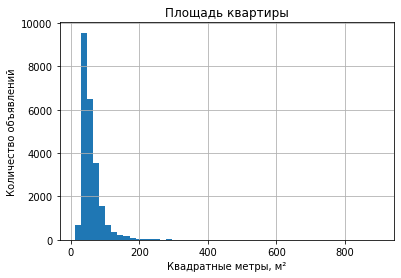

In [86]:
# гистограмма для столбца 'total_area'
ax = df['total_area'].hist(bins=50)
ax.set(xlabel='Квадратные метры, м²', ylabel='Количество объявлений', title='Площадь квартиры');

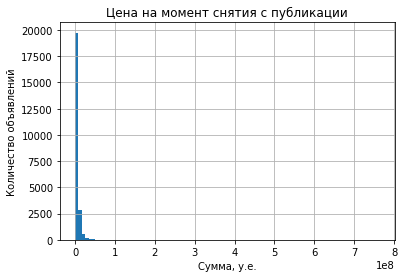

In [87]:
# гистограмма для столбца 'last_price'
ax = df['last_price'].hist(bins=90)
ax.set(xlabel='Сумма, у.е.', ylabel='Количество объявлений', title='Цена на момент снятия с публикации');

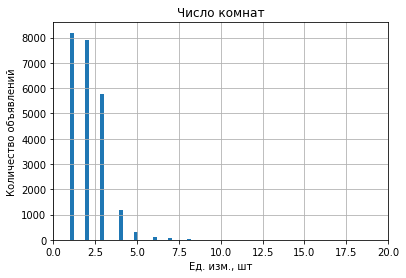

In [88]:
# гистограмма для столбца 'rooms'
ax = df['rooms'].hist(bins=80)
ax.set(xlabel='Ед. изм., шт', ylabel='Количество объявлений', title='Число комнат', xlim=(0, 20));

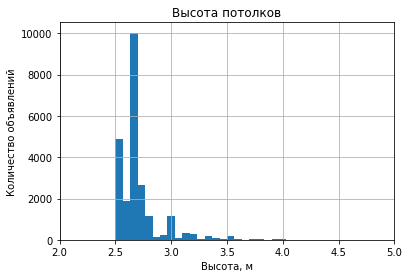

In [89]:
# гистограмма для столбца 'ceiling_height'
ax = df['ceiling_height'].hist(bins=30)
ax.set(xlabel='Высота, м', ylabel='Количество объявлений', title='Высота потолков', xlim=(2, 5));

В подавляющем большинстве все отраженные на гистограммах характеристики квартир тяготеют к минимальным параметрам.

**п. 2/7 (время продажи квартиры)**

In [90]:
# средняя 'mean' и медиана '50%'
df['days_exposition'].describe()

count    23565.000000
mean       171.464333
std        206.963869
min          1.000000
25%         45.000000
50%         95.000000
75%        202.000000
max       1580.000000
Name: days_exposition, dtype: float64

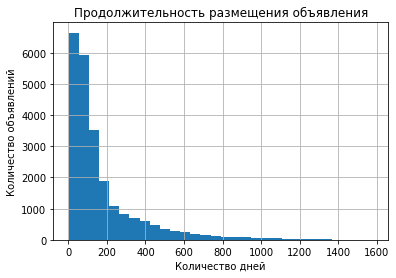

In [91]:
ax = df['days_exposition'].hist(bins=30)
ax.set(xlabel='Количество дней', ylabel='Количество объявлений', title='Продолжительность размещения объявления');

Половина объектов недвижимости реализуется менее чем за 100 дней (медиана = 92 дня). На эту цифру можно ориентироваться для рассмотрения сделки как удачной. Необычно долгим течением сделки можно считать продолжительность от 200 дней (третий квартиль).

**п. 3/7 (редкие и выбивающиеся значения)**

In [92]:
# наиболее интересные столбцы для анализа
origin_col = ['last_price', 'total_area', 'rooms', 'ceiling_height', 'balcony', 
              'parks_around3000', 'ponds_around3000', 'days_exposition']

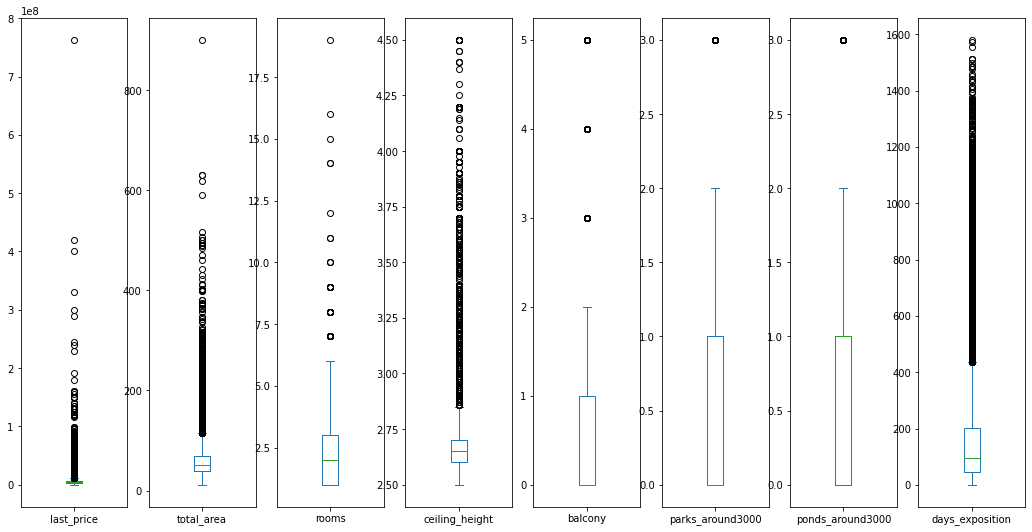

In [93]:
# диаграммы размаха для выбранных столбцов
fig, ax = plt.subplots(figsize=(18, 9), ncols=8)

df['last_price'].plot.box(ax=ax[0])
df['total_area'].plot.box(ax=ax[1])
df['rooms'].plot.box(ax=ax[2])
df['ceiling_height'].plot.box(ax=ax[3])
df['balcony'].plot.box(ax=ax[4])
df['parks_around3000'].plot.box(ax=ax[5])
df['ponds_around3000'].plot.box(ax=ax[6])
df['days_exposition'].plot.box(ax=ax[7]);

На представленных диаграммах видно, что наибольшее количество выбросов наблюдается в столбцах `last_price`, `total_area`, `ceiling_height` и `days_exposition`.

In [94]:
# количество строк до удаления выбросов
df.shape[0]

23565

In [95]:
cols = ['last_price', 'total_area', 'ceiling_height', 'days_exposition']

# к выбросам относятся значения, которые выходят за 1.5 межквартильного размаха IQR от Q1 вниз (или влево при горизонтальной ориентации),
# а также за 1.5 интервала от Q3 вверх (или вправо)
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# т.к. в данных очень большой процент выбросов, в учебных целях полуторный интервал увеличим в 10 раз
df = df[~((df[cols] < (Q1 - 15 * IQR)) | (df[cols] > (Q3 + 15 * IQR))).any(axis=1)]

In [96]:
# количество строк после удаления выбросов
df.shape[0]

23441

Было удалено 124 строки с выбросами.

**п. 4/7 (факторы, влияющие больше всего на стоимость квартиры)**

**Зависимость цены от площади, числа комнат, удаленности от центра**

In [97]:
# определим корреляцию параметров 'last_price','total_area', 'rooms' и 'cityCenters_nearest'
corr_heatmap = df[['last_price','total_area', 'rooms', 'cityCenters_nearest']].corr()
corr_heatmap.style.background_gradient(cmap='coolwarm').set_precision(2)

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.00,0.78,0.50,-0.33
total_area,0.78,1.00,0.78,-0.22
rooms,0.50,0.78,1.00,-0.18
cityCenters_nearest,-0.33,-0.22,-0.18,1.00


Выявлена заметная корреляция между ценой `last_price` и общей площадью `total_area`. Зависимость между ценой `last_price` и количеством комнат `rooms` средняя. Слабая отрицательная корреляция между ценой `last_price` и расстоянием до центра `cityCenters_nearest` говорит о том, что чем ближе к центру (или меньше расстояние), тем выше стоимость недвижимости.

**Зависимость цены от этажа расположения объекта недвижимости**

In [98]:
# построим сводную таблицу
floor_type = pd.pivot_table(df, index = 'apartment_floor', values = 'last_price', aggfunc='median')
floor_type

,last_price
apartment_floor,
другой,4800000
первый,3900000
последний,4300000


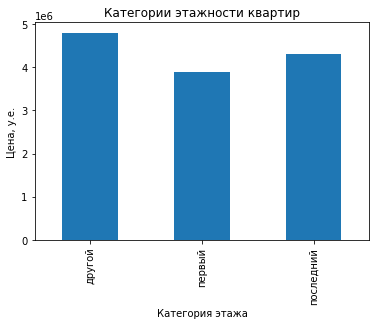

In [99]:
ax = floor_type.plot.bar()
ax.set(xlabel='Категория этажа', ylabel='Цена, у.е.', title='Категории этажности квартир')
ax.get_legend().remove();

Самой высокой медианной ценой обладают объекты недвижимости, расположенные между первым и последним этажами.

**Зависимость цены от даты размещения: дня недели, месяца и года**

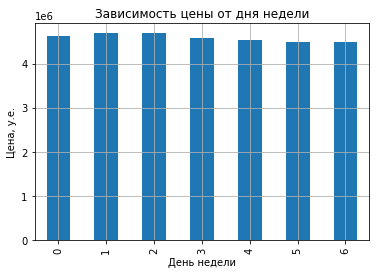

In [100]:
# построим сводную таблицу и столбчатую диаграмму для каждого случая
day_price = df.pivot_table(index = 'day_exposition', values = 'last_price', aggfunc='median')

ax = day_price.plot.bar(grid=True)
ax.set(xlabel='День недели', ylabel='Цена, у.е.', title='Зависимость цены от дня недели')
ax.get_legend().remove();

Продажи по дням недели распределены приблизительно равномерно: в начале недели можно отметить небольшой подъем, а к кончу недели чуть заметный спад активности.

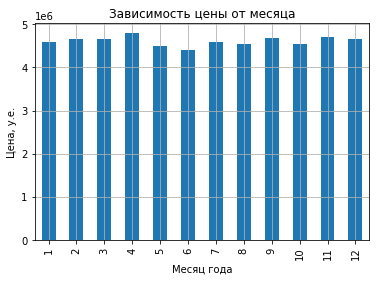

In [101]:
month_price = df.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc='median')

ax = month_price.plot.bar(grid=True)
ax.set(xlabel='Месяц года', ylabel='Цена, у.е.', title='Зависимость цены от месяца')
ax.get_legend().remove();

В конце весны и начале лета фиксируется небольшой спад активности.

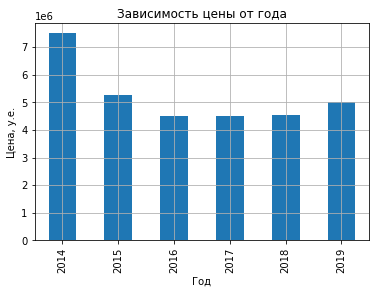

In [102]:
year_price = df.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc='median')

ax = year_price.plot.bar(grid=True)
ax.set(xlabel='Год', ylabel='Цена, у.е.', title='Зависимость цены от года')
ax.get_legend().remove();

Активность снижалась до 2016 года, после чего наблюдается плато продолжительностью 3 года. Далее фиксируется небольшой рост.

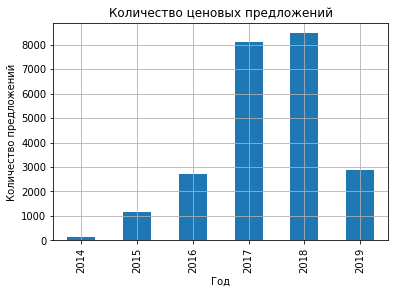

In [103]:
year_price = df.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc='count')

ax = year_price.plot.bar(grid=True)
ax.set(xlabel='Год', ylabel='Количество предложений', title='Количество ценовых предложений')
ax.get_legend().remove();

**п. 5/7 (10 населенных пунктов с наибольшим числом объявлений)**

In [104]:
# выделим населенные пункты с наибольшим количеством объявлений
top_10_cities = df['locality_name'].value_counts()[:10].to_dict()

# выбираем из всей таблицы строки, в которых присутствуют населенные пункты указанные в словаре выше
# на основе этих фильтрованных данных формируем сводную таблицу
round(df.query('locality_name in @top_10_cities').pivot_table(index='locality_name',
                                                values='square_meter_price', 
                                                aggfunc='mean').sort_values('square_meter_price', ascending=False)).astype(int)

,square_meter_price
locality_name,
Санкт-Петербург,112496
Пушкин,103125
деревня Кудрово,92473
поселок Парголово,90175
поселок Мурино,85629
поселок Шушары,78551
Колпино,75424
Гатчина,68746
Всеволожск,68654


In [105]:
# формируем словарь для параметра 'aggfunc'
round(df.query('locality_name in @top_10_cities').
      pivot_table(index='locality_name', values='square_meter_price', 
                  aggfunc={'square_meter_price': 'mean', 'locality_name': 'count'}).
      sort_values('square_meter_price', ascending=False).
      rename(columns={'locality_name':'Число объявлений', 'square_meter_price': 'Цена за кв.м., у.е.'}).
      sort_index(axis=1, level=1).
      rename_axis(None, axis=0)).astype(int)

,"Цена за кв.м., у.е.",Число объявлений
Санкт-Петербург,112496,15529
Пушкин,103125,369
деревня Кудрово,92473,299
поселок Парголово,90175,327
поселок Мурино,85629,552
поселок Шушары,78551,439
Колпино,75424,338
Гатчина,68746,307
Всеволожск,68654,398
Выборг,58093,236


Самый дорогой по стоимости квадратный метр недвижимости в городе `Санкт-Петербург`, самый дешевый из перечня отобранных в городе `Выборг`. Разница стоимости квадратного метра жилья между этими двумя городами отличается приблизительно в 2 раза.

**п. 6/7 (зависимость цены от расстояния до центра для города `Санкт-Петербург`)**

In [106]:
# выделяем строки с указанным городом в отдельную таблицу
df_price_distance_center = df.query('locality_name == "Санкт-Петербург"').reset_index(drop=True)
df_price_distance_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month_exposition,year_exposition,apartment_floor,living_total_area_ratio,kitchen_total_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,...,482.0,2.0,755.0,114,120370,3,3,2019,другой,0.47,0.23
1,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,...,90.0,2.0,574.0,558,92785,3,8,2015,другой,0.61,0.15
2,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,112.0,1.0,48.0,121,100000,1,6,2018,другой,0.32,0.41
3,5,7915000,71.6,2019-04-18,2,2.65,24,30.5,22,False,False,...,0.0,0.0,0.0,90,110544,3,4,2019,другой,0.43,0.26
4,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,...,0.0,0.0,0.0,289,88524,6,2,2017,другой,0.71,0.11


In [107]:
# создаем дополнительный столбец
df_price_distance_center['distance_km'] = round(df_price_distance_center['cityCenters_nearest'] / 1000)
df_price_distance_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month_exposition,year_exposition,apartment_floor,living_total_area_ratio,kitchen_total_area_ratio,distance_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,...,2.0,755.0,114,120370,3,3,2019,другой,0.47,0.23,16.0
1,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,...,2.0,574.0,558,92785,3,8,2015,другой,0.61,0.15,14.0
2,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,1.0,48.0,121,100000,1,6,2018,другой,0.32,0.41,8.0
3,5,7915000,71.6,2019-04-18,2,2.65,24,30.5,22,False,False,...,0.0,0.0,90,110544,3,4,2019,другой,0.43,0.26,12.0
4,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,...,0.0,0.0,289,88524,6,2,2017,другой,0.71,0.11,15.0


In [108]:
# строим сводную таблицу для отображения средней стоимости квадратного метра недвижимости в зависимости от расстояния до центра
distance_price_pivot = round(pd.pivot_table(df_price_distance_center, index='distance_km', values='square_meter_price', aggfunc='mean')).astype(int)
distance_price_pivot.head()

,square_meter_price
distance_km,
0.0,212257
1.0,145962
2.0,140747
3.0,118777
4.0,127894


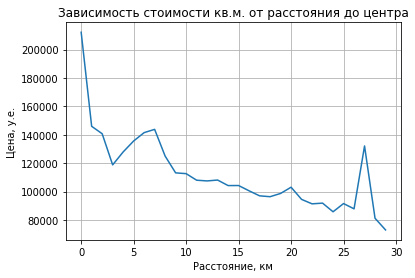

In [109]:
# построим график
ax = distance_price_pivot.plot(grid=True)
ax.set(xlabel='Расстояние, км', ylabel='Цена, у.е.', title='Зависимость стоимости кв.м. от расстояния до центра')
ax.get_legend().remove();

В качестве условного центра можно рассматривать расстояние с радиусом приблизительно 10 км. После этой отметки график начинает плавно спадать, за исключением выброса в самом его конце.

**п. 7/7 (исследование квартир в центре, Санкт-Петербург)**

In [110]:
# выделяем строки с указанным городом в отдельную таблицу
# создадим фильтр по радиусу от центра
df_segment_inspect = df_price_distance_center.query('distance_km <= 10')
df_segment_inspect.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_exposition,month_exposition,year_exposition,apartment_floor,living_total_area_ratio,kitchen_total_area_ratio,distance_km
2,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,...,1.0,48.0,121,100000,1,6,2018,другой,0.32,0.41,8.0
11,13,3200000,31.6,2018-03-14,1,2.65,5,16.9,2,False,False,...,0.0,0.0,310,101265,2,3,2018,другой,0.53,0.18,10.0
13,8,6500000,97.2,2015-10-31,2,2.65,3,46.5,1,False,False,...,3.0,124.0,265,66872,5,10,2015,первый,0.48,0.20,2.0
21,6,15500000,149.0,2017-06-26,5,2.65,5,104.0,4,False,False,...,1.0,779.0,644,104026,0,6,2017,другой,0.70,0.11,4.0
31,7,45000000,161.0,2017-10-17,3,3.20,8,38.0,4,False,False,...,3.0,99.0,541,279503,1,10,2017,другой,0.24,0.31,7.0


**параметры для изучения: площадь, цена, число комнат, высота потолков**

In [111]:
# определим корреляцию параметров 'total_area', 'last_price', 'rooms' и 'ceiling_height'
corr_heatmap = df_segment_inspect[['total_area', 'last_price', 'rooms', 'ceiling_height']].corr()
corr_heatmap.style.background_gradient(cmap='coolwarm').set_precision(2)

,total_area,last_price,rooms,ceiling_height
total_area,1.00,0.75,0.80,0.33
last_price,0.75,1.00,0.49,0.27
rooms,0.80,0.49,1.00,0.29
ceiling_height,0.33,0.27,0.29,1.00


Выявлена заметная корреляция между ценой `last_price` и общей площадью `total_area`. Высокая корреляция между общей площадью `total_area` и количеством комнат `rooms`. Средняя корреляция между ценой `last_price` и количеством комнат `rooms`. Для остальных параметров – корреляция слабая положительная.

**факторы влияния на стоимость: число комнат, этаж, удалённость от центра, дата размещения объявления**

**Зависимость цены от числа комнат, удаленности от центра**

In [112]:
# определим корреляцию параметров 'last_price', 'rooms' и 'cityCenters_nearest'
corr_heatmap = df_segment_inspect[['last_price', 'rooms', 'cityCenters_nearest']].corr()
corr_heatmap.style.background_gradient(cmap='coolwarm').set_precision(2)

,last_price,rooms,cityCenters_nearest
last_price,1.00,0.49,-0.25
rooms,0.49,1.00,-0.29
cityCenters_nearest,-0.25,-0.29,1.00


Средняя корреляция между ценой `last_price` и количеством комнат `rooms`. Слабая отрицательная корреляция для остальных параметров.

**Зависимость цены от этажа расположения объекта недвижимости**

In [113]:
# построим сводную таблицу
pd.pivot_table(df_segment_inspect, index = 'apartment_floor', values = 'last_price', aggfunc='median')

,last_price
apartment_floor,
другой,8150000
первый,5950000
последний,8000000


Самой высокой медианной ценой обладают объекты недвижимости, расположенные между первым и последним этажами.

**Зависимость цены от даты размещения: дня недели, месяца и года**

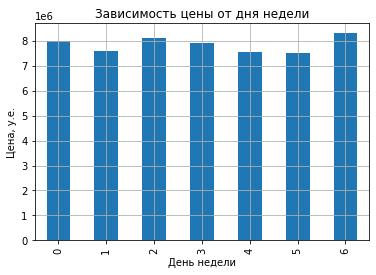

In [114]:
# постороим сводную таблицу и столбчатую диаграмму для каждого случая
day_price_inspect = df_segment_inspect.pivot_table(index = 'day_exposition', values = 'last_price', aggfunc='median')

ax = day_price_inspect.plot.bar(grid=True)
ax.set(xlabel='День недели', ylabel='Цена, у.е.', title='Зависимость цены от дня недели')
ax.get_legend().remove();

Небольшой спад активности наблюдается в начале и конце недели.

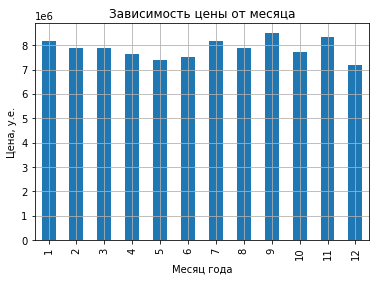

In [115]:
month_price_inspect = df_segment_inspect.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc='median')

ax = month_price_inspect.plot.bar(grid=True)
ax.set(xlabel='Месяц года', ylabel='Цена, у.е.', title='Зависимость цены от месяца')
ax.get_legend().remove();

С начала года до первого месяца лета идет спад, далее наблюдается относительный подъем с колебаниями. К концу кода фиксируется заметный спад активности.

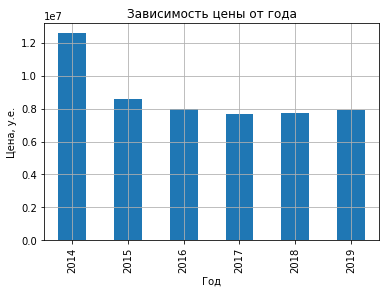

In [116]:
year_price_inspect = df_segment_inspect.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc='median')

ax = year_price_inspect.plot.bar(grid=True)
ax.set(xlabel='Год', ylabel='Цена, у.е.', title='Зависимость цены от года')
ax.get_legend().remove();

Активность снижалась до 2017 года, после чего фиксируется небольшой рост.

### Вывод

- Как для всей исследуемой таблицы (см. п. 4/7), так и для выборки по центру города Санкт-Петербург (см. п. 7/7): на стоимость объекта недвижимости существенное влияние оказывает общая площадь, умеренное – количество комнат, слабое положительное – высота потолков и слабое отрицательное – расстояние до центра города.  
- Как для всей исследуемой таблицы, так и для выборки по центру города Санкт-Петербург: наиболее дорогое жилье расположено между первым и последним этажами. 
- Календарные диаграммы (день, месяц, год) для общей таблицы и выборки по центру города Санкт-Петербург имеют приблизительно схожие тенденции.

## Общий вывод

- В ходе проведенного исследования был изучен массив данных по объектам недвижимости в городе Санкт-Петербург и близлежащих населенных пунктах. Первоначальный размер выборки: 23699 строки и 22 столбца.
- Была выполнена предварительная обработка данных, в ходе которой отсутствующие данные восстанавливались. Аномальные данные корректировались. Удаление строк из общей таблицы применялось крайне редко. После окончания исследования количество строк уменьшилось до 23441, т.е. сократилось приблизительно на 1%. Оригинальные столбцы из таблицы не удалялись.  
- В ходе исследования была применена методика, которая позволила выделить радиус условного центра города с привязкой к стоимости жилья. Величина радиуса, описывающего условный центр города, составляет приблизительно 10 км. 
- Для факторов влияния на стоимость жилья (таких как: число комнат, этаж, удалённость от центра, дата размещения объявления) наблюдаются схожие тенденции как для центра города Санкт-Петербург, так и для всей исследуемой таблицы в целом.  
На стоимость объекта недвижимости больше всего влияет его общая площадь (самый высокий коэффициент корреляции со значением 0,78 среди остальных факторов).  
Самая низкая цена на недвижимость фиксировалась в 2017 года (приблизительно на 60% ниже по сравнению с 2014 годом, когда был выявлен максимум цен), в этот же год был отмечен резкий многократный подъем числа предложений на рынке.
Некоторое снижение цен на рынке недвижимости проявляется в конце весны (май) и начале лета (июнь), для рынка Санкт-Петербурга также можно отметить снижение в начале зимы (декабрь). Падение цен может достигать 10%.